# Imports

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
from sklearn.model_selection import learning_curve

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Model Evaluation

In [3]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Baseline : Encoded

In [4]:
baseline_it = pd.read_pickle("data/baseline_it.pkl")

In [5]:
X = baseline_it.drop("bank_account_Yes",axis=1)

In [6]:
y = baseline_it[["bank_account_Yes"]]

## Logistic regression

### Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=1)
logr = LogisticRegression(random_state=0,max_iter = 1000)
logr.fit(X_train,y_train)
logr.score(X_test,y_test)

0.8828905419766206

In [8]:
evaluate_model(logr, X_test, y_test)

{'acc': 0.8828905419766206,
 'prec': 0.6761006289308176,
 'rec': 0.32428355957767724,
 'f1': 0.4383282364933741,
 'kappa': 0.3818564751926412,
 'fpr': array([0.        , 0.        , 0.        , ..., 0.99653637, 0.99703117,
        1.        ]),
 'tpr': array([0.        , 0.0015083 , 0.04374057, ..., 1.        , 1.        ,
        1.        ]),
 'auc': 0.8483767350810458,
 'cm': array([[3939,  103],
        [ 448,  215]])}

## Decision Tree model

### Model

In [9]:
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8382571732199787
Precision: 0.4186046511627907
Recall: 0.38009049773755654
F1 Score: 0.3984189723320158
Cohens Kappa Score: 0.30523832688505614
Area Under Curve: 0.6536840176637015
Confusion Matrix:
 [[3692  350]
 [ 411  252]]


### Learning Curve

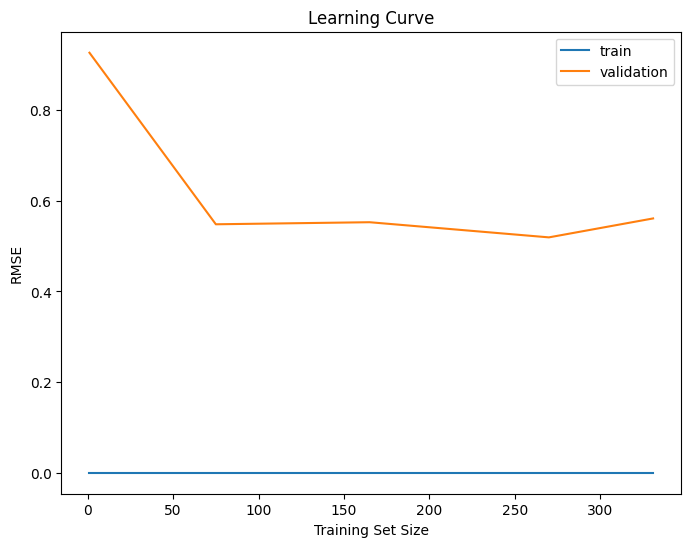

In [19]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = dtc,
    X=X,y=y, 
    cv = 5, 
    scoring = "neg_root_mean_squared_error",
    train_sizes = [1,75,165,270,331])

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(8,6))
plt.plot(train_sizes,train_mean,label="train")
plt.plot(train_sizes,test_mean,label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

## KNN Classifier

### Model 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [22]:
evaluate_model(knn, X_test, y_test)

{'acc': 0.8699256110520722,
 'prec': 0.6808510638297872,
 'rec': 0.14479638009049775,
 'f1': 0.23880597014925375,
 'kappa': 0.1992277773235509,
 'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.89609104e-04, 5.44285007e-03, 1.11331024e-02, 2.22662048e-02,
        4.40376051e-02, 8.68381989e-02, 1.54379020e-01, 2.86244433e-01,
        5.55170708e-01, 1.00000000e+00]),
 'tpr': array([0.        , 0.00452489, 0.01206637, 0.02564103, 0.05580694,
        0.08295626, 0.14479638, 0.22473605, 0.31975867, 0.43137255,
        0.55957768, 0.69381599, 0.89140271, 1.        ]),
 'auc': 0.7749894956650494,
 'cm': array([[3997,   45],
        [ 567,   96]])}

### Learning curve

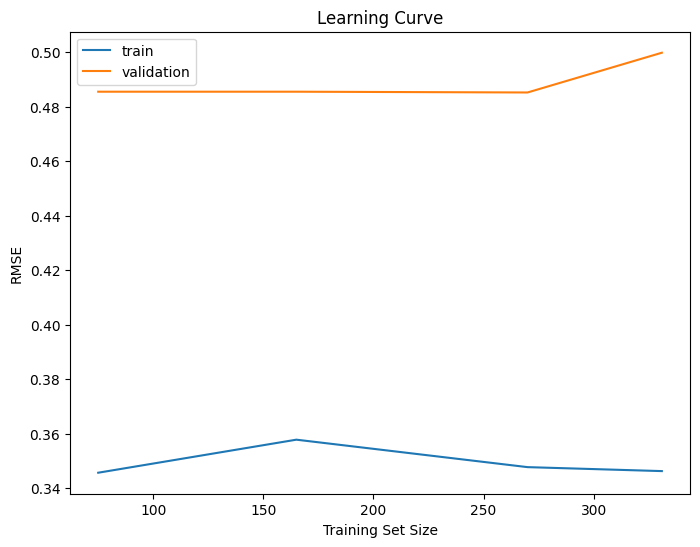

In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = knn,
    X=X,y=y, 
    cv = 5, 
    scoring = "neg_root_mean_squared_error",
    train_sizes = [1,75,165,270,331])

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(8,6))
plt.plot(train_sizes,train_mean,label="train")
plt.plot(train_sizes,test_mean,label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

## Naives Bayesian

### Model

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)

0.8456960680127524

In [25]:
evaluate_model(gnb, X_test, y_test)

{'acc': 0.8456960680127524,
 'prec': 0.45987261146496816,
 'rec': 0.5444947209653092,
 'f1': 0.4986187845303867,
 'kappa': 0.40819968364134707,
 'fpr': array([0.        , 0.00618506, 0.00618506, ..., 0.99826818, 0.99876299,
        1.        ]),
 'tpr': array([0.        , 0.13574661, 0.14027149, ..., 1.        , 1.        ,
        1.        ]),
 'auc': 0.8281725890219065,
 'cm': array([[3618,  424],
        [ 302,  361]])}

### RoC

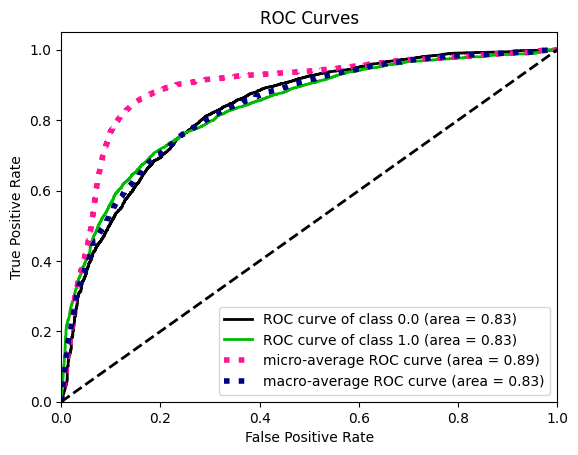

In [26]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_true = y.copy()
y_probas = gnb.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

### Learning curve

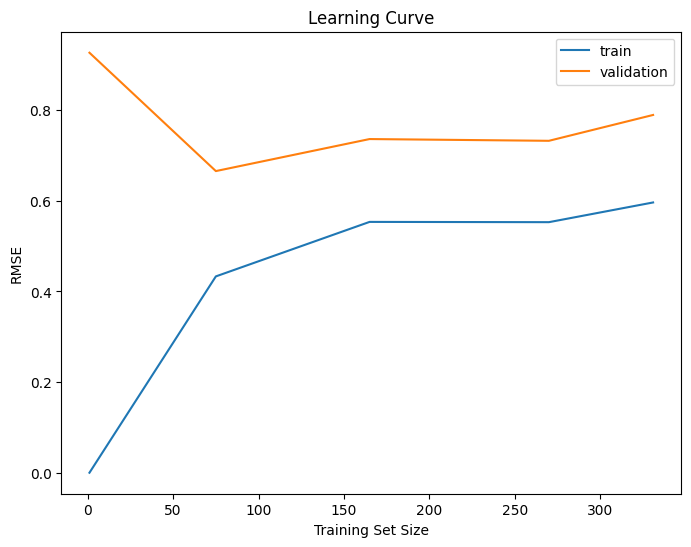

In [27]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = gnb,
    X=X,y=y, 
    cv = 5, 
    scoring = "neg_root_mean_squared_error",
    train_sizes = [1,75,165,270,331])

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(8,6))
plt.plot(train_sizes,train_mean,label="train")
plt.plot(train_sizes,test_mean,label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

## Dummy Classifier

In [63]:
from sklearn.dummy import DummyClassifier

dummy_mf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_mf.fit(X_train, y_train)

# calculate the score
dummy_mf.score(X_test, y_test)

predicts = dummy_mf.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      4063
         1.0       0.36      0.75      0.49       642

    accuracy                           0.79      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.87      0.79      0.81      4705



# Second iteration : encoded and MinMax scaled

In [28]:
second_it = pd.read_pickle("data/second_it.pkl")

In [29]:
y = second_it[["bank_account_Yes"]]
X = second_it.drop("bank_account_Yes",axis=1)

## KNN

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=1)

In [31]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [32]:
evaluate_model(knn, X_test, y_test)

{'acc': 0.8801275239107332,
 'prec': 0.6701030927835051,
 'rec': 0.29411764705882354,
 'f1': 0.4088050314465409,
 'kappa': 0.3532021808056345,
 'fpr': array([0.00000000e+00, 7.42206828e-04, 1.97921821e-03, 5.44285007e-03,
        7.91687284e-03, 1.33597229e-02, 2.37506185e-02, 3.90895596e-02,
        5.98713508e-02, 9.40128649e-02, 1.52647204e-01, 2.50371103e-01,
        4.84413657e-01, 1.00000000e+00]),
 'tpr': array([0.        , 0.04223228, 0.09653092, 0.14177979, 0.18099548,
        0.23680241, 0.29411765, 0.35746606, 0.42684766, 0.5173454 ,
        0.61085973, 0.74358974, 0.87933635, 1.        ]),
 'auc': 0.8077277574905424,
 'cm': array([[3946,   96],
        [ 468,  195]])}

## Logistic regression : weighted

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=1)
logr = LogisticRegression(random_state=0,max_iter = 1000,class_weight={0:1,1:6})
logr.fit(X_train,y_train)
logr.score(X_test,y_test)

0.7904357066950053

In [34]:
evaluate_model(logr, X_test, y_test)

{'acc': 0.7904357066950053,
 'prec': 0.37293469708890636,
 'rec': 0.7149321266968326,
 'f1': 0.49017580144777667,
 'kappa': 0.3742848109904825,
 'fpr': array([0.        , 0.        , 0.        , ..., 0.99505195, 0.99604156,
        1.        ]),
 'tpr': array([0.        , 0.0015083 , 0.04223228, ..., 1.        , 1.        ,
        1.        ]),
 'auc': 0.8490752826841542,
 'cm': array([[3245,  797],
        [ 189,  474]])}

# Feature selection

## Feature permutation

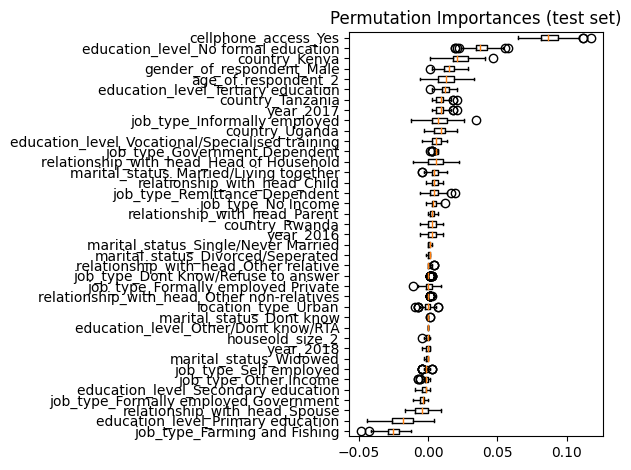

In [35]:
from sklearn.inspection import permutation_importance

# Perform Permutation
permutation_score = permutation_importance(logr, 
                                           X_test, y_test,
                                           scoring='recall',
                                           random_state=3,
                                           n_repeats=100) 

# Unstack results
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 

importance_df.columns=['feature','feature importance']

# Order by importance
importance_df.sort_values(by="feature importance", ascending = False)

sorted_idx = permutation_score.importances_mean.argsort()  

fig, ax = plt.subplots() 
ax.boxplot(permutation_score.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]) 
ax.set_title("Permutation Importances (test set)") 
fig.tight_layout() 
plt.show()

## SelectFromModel

In [36]:
from sklearn.feature_selection import SelectFromModel
lsvc = logr.fit(X, y)
model = SelectFromModel(logr, prefit=True)
X_new = model.transform(X)

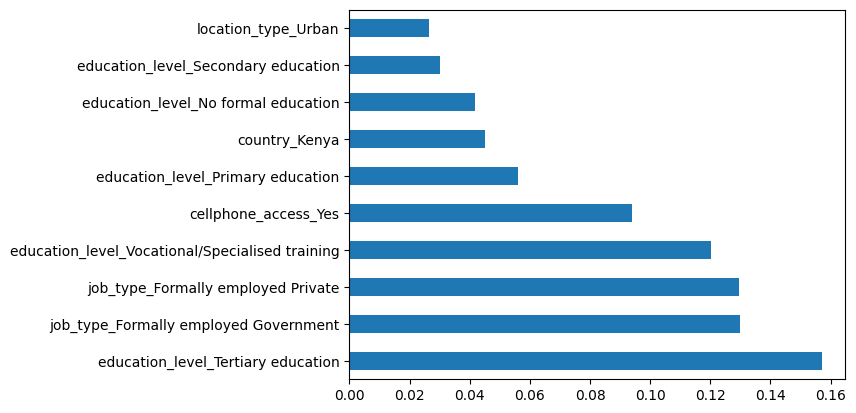

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=5)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Mutual information scores

In [38]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

cellphone_access_Yes                               0.036820
education_level_Vocational/Specialised training    0.017585
relationship_with_head_Spouse                      0.013377
country_Kenya                                      0.012372
relationship_with_head_Head of Household           0.011078
job_type_Formally employed Government              0.009090
relationship_with_head_Parent                      0.004829
age_of_respondent_2                                0.003263
country_Uganda                                     0.002871
job_type_Government Dependent                      0.000777
job_type_Self employed                             0.000000
education_level_Other/Dont know/RTA                0.000000
job_type_Farming and Fishing                       0.000000
Name: MI Scores, dtype: float64

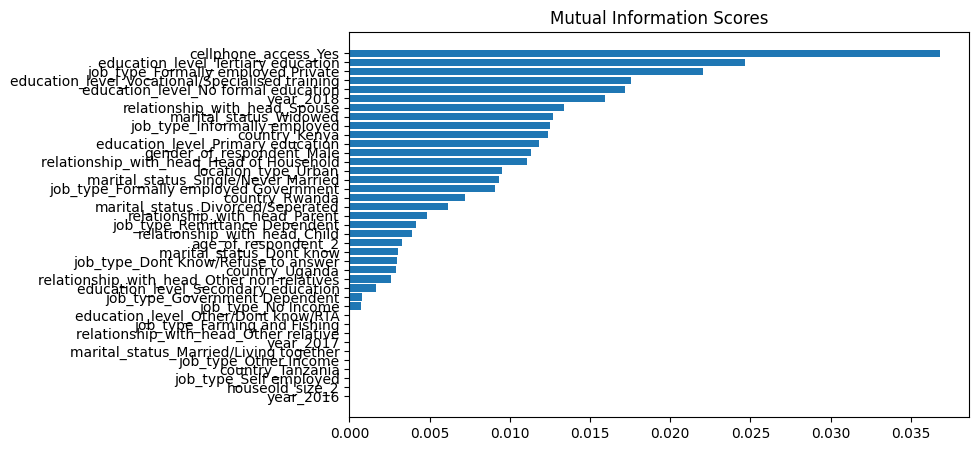

In [39]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Third iteration : Feature selection (gender), encoded, MinMax Scaled

In [42]:
X = second_it.drop(["bank_account_Yes","gender_of_respondent_Male"],axis=1)

## Logistic regression : weighted

### Model

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=1)
logr = LogisticRegression(random_state=0,max_iter = 1000,class_weight={0:1,1:6})
logr.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 6}, max_iter=1000, random_state=0)

In [52]:
predictions = logr.predict(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      4042
         1.0       0.38      0.71      0.49       663

    accuracy                           0.79      4705
   macro avg       0.66      0.76      0.68      4705
weighted avg       0.86      0.79      0.82      4705



### RoC

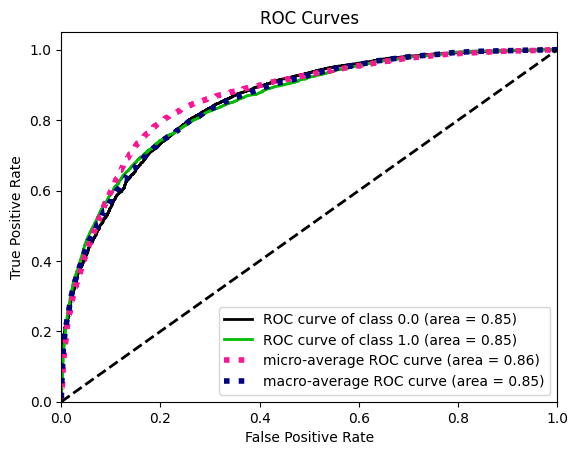

In [55]:
y_true = y.copy()
y_probas = logr.predict_proba(X)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

## Decision Tree

In [48]:
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
predictions = dtc.predict(X_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      4042
         1.0       0.42      0.37      0.39       663

    accuracy                           0.84      4705
   macro avg       0.66      0.64      0.65      4705
weighted avg       0.83      0.84      0.83      4705



## Dummy Classifier

### Model

In [66]:
dummy_mf = DummyClassifier(strategy="stratified")

# fit the modem
dummy_mf.fit(X_train, y_train)

# calculate the score
dummy_mf.score(X_test, y_test)

predicts = dummy_mf.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      4063
         1.0       0.36      0.75      0.49       642

    accuracy                           0.79      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.87      0.79      0.81      4705



In [68]:
dummy_c= DummyClassifier(strategy="constant", constant = 0 )

# fit the modem
dummy_c.fit(X_train, y_train)

# calculate the score
dummy_c.score(X_test, y_test)

predicts = dummy_c.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      4063
         1.0       0.36      0.75      0.49       642

    accuracy                           0.79      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.87      0.79      0.81      4705



# Fourth iteration : balancing

In [70]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

#Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

#Train the model
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus) #Training the model

#Test the model
predictions = model.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

[('bank_account_Yes', 1)]
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      4063
         1.0       0.36      0.75      0.49       642

    accuracy                           0.79      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.87      0.79      0.81      4705



# Ouverture

In [69]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      4063
         1.0       0.49      0.56      0.52       642

    accuracy                           0.86      4705
   macro avg       0.71      0.73      0.72      4705
weighted avg       0.87      0.86      0.86      4705



# Conclusion temporaire